# Projeto Final Big Data Science
Como tarefa do time, vocês recebem a incumbência de fazer uma análise dos
dados coletas no ENEM 2021. Como colher de chá, já que encontrar e vasculhar a
fonte dos dados é seu trabalho, seu supervisor te envia o link de onde encontrar os
dados:
[Enem 2021](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-
abertos/microdados/enem)
Ele
então
combina
com
o
time
de
entregar os relatórios 1 semana depois, como um jupyter notebook e um pdf/html
no formato de relatório escrito, com título, introdução e contextualização histórica
e político-social se necessário (com referências), introdução ao tema
abordado, desenvolvimento de seus pontos com a ajuda da exploração dos dados,
métodos estatísticos etc., hipóteses levantadas e possíveis direções para o órgão
público que será dirigido. Ele diz também para se sentir livre para usar qualquer
método estatístico ou de machine learning que você conhece, trazer previsões,
gráficos, dentre outros métodos para suportar sua argumentação.
Lembre-se que você trabalha com dados, mas ficar somente olhando para os
dados é geralmente uma má ideia. Então procure fontes em outras áreas
especializadas nos problemas que vocês irão abordar, como ciências sociais, ciências
políticas etc., mas sempre garanta com estatísticas e dados que o contexto previsto
para determinada hipótese realmente se dá na situação específica que você está
analisando. Ou seja, sempre case a teoria com o contexto que os dados
trazem. Quando não é possível delimitar um contexto específico
apenas com dados ou com os dados em mãos, deixe isso claro e traga argumentação
de outras áreas do conhecimento, ou simplesmente ache outra linha para explorar.
O projeto deve estar no github.com, a forma de organizar o conteúdo é por
sua conta, caso nunca tenha usado, este já é seu primeiro desafio.
Ao final do projeto, você deve preencher o formulário com o seu nome
completo, e-mail utilizado no treinamento e o link do github do seu projeto.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#O objetivo é fazer uma análise dos dados do enem de 2021 

## 1. Importando os dados do enem 2021

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
caminho = '/content/drive/MyDrive/enem_2021/MICRODADOS_ENEM_2021.csv'

In [5]:
micro_dados_enem = pd.read_csv(caminho, sep=';', encoding='ISO-8859-1')

In [6]:
micro_dados_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


Olhando as colunas dos dados csv

In [7]:
micro_dados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

## 2. Selecionando colunas

In [8]:
colunas_selecionadas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [9]:
micro_dados_selecionados = micro_dados_enem.filter(items=colunas_selecionadas)

In [10]:
micro_dados_selecionados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,1,3,1,NaN,0,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,1,11,1,NaN,0,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,1,15,1,NaN,0,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,1,2,0,2,1.0,0,...,B,A,A,B,A,B,E,A,B,B


## 3. Análise sobre a faixa etaria dos inscritos no enem

In [67]:
coluna_faixa_etaria = micro_dados_selecionados['TP_FAIXA_ETARIA']
total_faixa_etaria_lista = []
for index in range(1, 21):
    total_faixa_etaria = (coluna_faixa_etaria == index).sum()
    total_faixa_etaria_lista.append(total_faixa_etaria)

faixa_etaria = ['menor de 17', '17', '18', '19', '20', '21', '22',
                '23', '24', '25', 'entre 26 e 30', 'entre 31 e 35',
                'entre 36 e 40', 'entre 41 e 45', 'entre 46 e 50',
                'entre 51 e 55', 'entre 56 e 60', 'entre 61 e 65',
                'entre 66 e 70', 'maior de 70']


Text(0, 0.5, 'Quantidade')

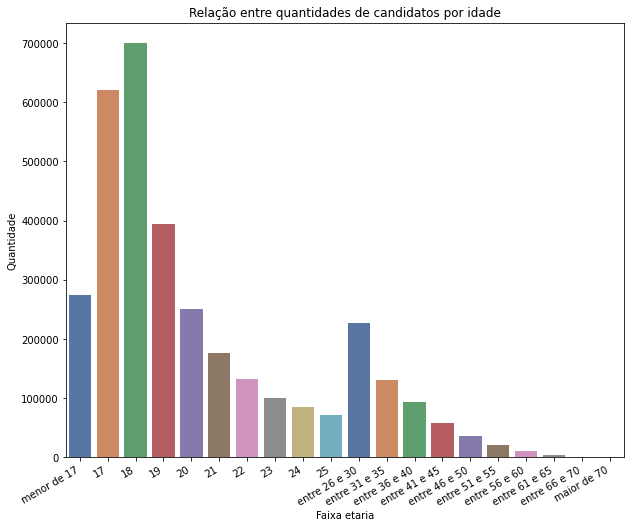

In [68]:
f, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
ax.set(title='Relação entre quantidades de candidatos por idade')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
sns.barplot(
    x=faixa_etaria, 
    y=total_faixa_etaria_lista, 
    palette='deep',
    ax=ax, 
    )
ax.set_xlabel('Faixa etaria')
ax.set_ylabel('Quantidade')

Podemos observar que as maiores quantidade de inscrito tem idade 17 e 18 anos. E as menores quantidades de inscritos, estão entre 66 anos à maiores de 70 anos

In [13]:
total_faixa_etaria_Serie = pd.Series(total_faixa_etaria_lista)

In [14]:
entre_66_e_70 = total_faixa_etaria_Serie.iloc[-2]
maior_70 = total_faixa_etaria_Serie.iloc[-1]

print(f'Quantidade de inscrito na faixa etaria entre\
       66 e 70 anos: {entre_66_e_70}')

print(f'Quantidade de inscrito na faixa etaria maior de 70 anos: {maior_70}')

Quantidade de inscrito na faixa etaria entre       66 e 70 anos: 1342
Quantidade de inscrito na faixa etaria maior de 70 anos: 560


###4. Análise de quantidade de inscrito por sexo

In [15]:
coluna_TP_SEXO = micro_dados_selecionados['TP_SEXO']
coluna_TP_SEXO.value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

Porcentagem de cada sexo

In [16]:
dist_Tp_Sexo = coluna_TP_SEXO.value_counts()
percent_Tp_Sexo = [100 * index/dist_Tp_Sexo.sum() for index in dist_Tp_Sexo]
percent_Tp_Sexo

[61.67048986498446, 38.32951013501554]

Pode ver que o sexo femenino tem 61% em todos os dados

## 5. Maiores notas

Selecionando as colunas das notas

In [17]:
colunas_Nu_notas_selecionadas = micro_dados_enem.filter(items = [
    'NU_INSCRICAO',
    'NU_NOTA_CN', 
    'NU_NOTA_CH', 
    'NU_NOTA_LC', 
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO'
])

In [18]:
colunas_Nu_notas_selecionadas.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210053865474,NaN,574.6,472.6,NaN,760.0
1,210052384164,505.9,551.8,498.3,461.5,560.0
2,210052589243,NaN,NaN,NaN,NaN,NaN
3,210052128335,580.7,678.9,638.9,659.5,780.0
4,210051353021,497.7,532.4,457.6,582.6,780.0


Podemos ver que tem alguns dados em que estão faltando, os ***NaN's***.
Devido apandêmia, desde 2020 o enem tem duas modalidades, a prova presencial e a prova eletrónica.
Teremos que vísualizar as duas notas das duas modalidades.

Visualizando as colunas que estão as informações TP_presenca.

In [19]:
colunas_Tp_presenca_selecionadas = micro_dados_enem.filter(items = [
    'NU_INSCRICAO',
    'TP_PRESENCA_CN', 
    'TP_PRESENCA_CH', 
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT'
])

Fazendo uma análise sobre os dados

Montando o dicionário da situação dos candidatos.

In [20]:
dicionario_Tp_presenca = {
    0: 'Faltou a prova',
    1: 'Presente na prova',
    2: 'Eliminado na prova'
}

In [21]:
colunas_Tp_presenca_selecionadas['NO_PRESENCA_MT'] = [
    dicionario_Tp_presenca[resposta] 
    for resposta in colunas_Tp_presenca_selecionadas.TP_PRESENCA_MT]

In [22]:
colunas_Tp_presenca_selecionadas.filter(items=['NO_PRESENCA_MT']).value_counts()

NO_PRESENCA_MT    
Presente na prova     2245844
Faltou a prova        1142539
Eliminado na prova       1449
dtype: int64

### Análizando os dados faltas
Observando a coluna NO_PRESENCA_MT, podemos observar que os dados faltantes da colunas NU_NOTA_MT são candidatos que faltaram ou foram eliminados. Notando que fizemos essa análise para as notas de matemática. Podemos concluir da mesma forma para as outras notas, no caso, para colunas referentes para notas.

In [23]:
faltou = colunas_Tp_presenca_selecionadas.filter(items=['NO_PRESENCA_MT'])\
    .value_counts()[1]
eliminado = colunas_Tp_presenca_selecionadas.filter(items=['NO_PRESENCA_MT'])\
    .value_counts()[2]
dados_faltante_Mt = colunas_Nu_notas_selecionadas['NU_NOTA_MT'].isnull().sum()

In [24]:
print(f'Quantidade de candidatos faltantes e eliminados Matemática :\
 {faltou+eliminado}')
print(f'Quantidade de dados faltas da colunas notas Matemática (NU_NOTA_MT):\
 {dados_faltante_Mt}')

Quantidade de candidatos faltantes e eliminados Matemática : 1143988
Quantidade de dados faltas da colunas notas Matemática (NU_NOTA_MT): 1143988


Podemos visualizar no gráfico de barra.

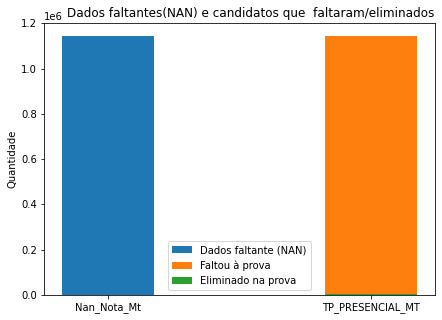

In [25]:
width = 0.35 

fig, ax = plt.subplots(1, 1, figsize=(7, 5))


ax.bar('Nan_Nota_Mt', dados_faltante_Mt, width, label='Dados faltante (NAN)')

ax.bar('TP_PRESENCIAL_MT', faltou, width,
       label='Faltou à prova')
ax.bar('TP_PRESENCIAL_MT', eliminado, width,
       bottom=eliminado, label='Eliminado na prova')

ax.set_ylabel('Quantidade')
ax.set_title('Dados faltantes(NAN) e candidatos que \
 faltaram/eliminados', loc='right')
ax.legend()

plt.show()

Dessa forma, podemos eliminar as linhas dos dados faltantes

In [26]:
colunas_Nu_notas_selecionadas = colunas_Nu_notas_selecionadas.dropna()
colunas_Nu_notas_selecionadas.describe()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06
mean,2.100527e+11,4.919010e+02,5.231820e+02,5.048753e+02,5.351971e+02,6.225462e+02
std,9.969374e+05,8.049976e+01,9.438626e+01,7.809703e+01,1.105777e+02,1.839687e+02
min,2.100510e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100519e+11,4.311000e+02,4.489000e+02,4.501000e+02,4.448000e+02,5.200000e+02
50%,2.100527e+11,4.821000e+02,5.256000e+02,5.082000e+02,5.155000e+02,6.200000e+02
75%,2.100536e+11,5.459000e+02,5.919000e+02,5.608000e+02,6.140000e+02,7.400000e+02
max,2.100545e+11,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02,1.000000e+03


Podemos ver a distribuição das notas de cada área. Podemos observar que a nota da redação é a única que tem 0 e tem nota 1000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1b7531dd0>,
      dtype=object)

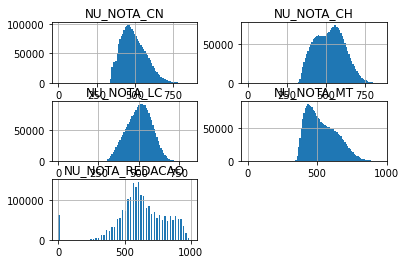

In [27]:
colunas_Nu_notas_selecionadas_areas = colunas_Nu_notas_selecionadas\
    .filter(items=[
    'NU_NOTA_CN', 
    'NU_NOTA_CH', 
    'NU_NOTA_LC', 
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO'
    ])

colunas_Nu_notas_selecionadas_areas.hist(bins=100)

In [28]:
areas = [area for area in colunas_Nu_notas_selecionadas_areas.keys()]

O total somado das notas usando de forma visual o gráfico de barra.

Text(0, 0.5, 'Somatário das notas')

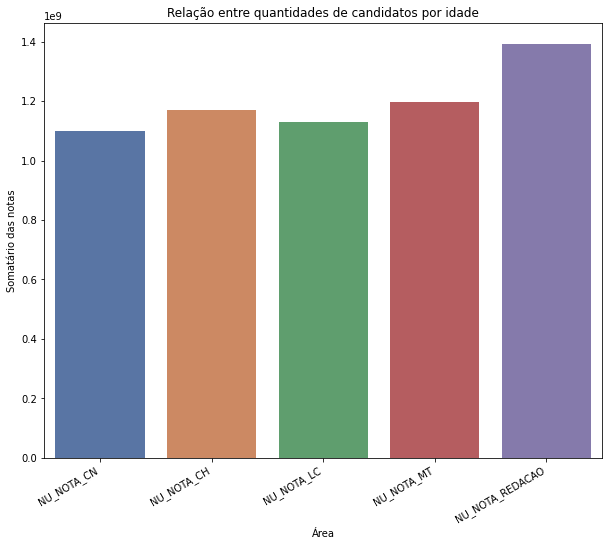

In [29]:
total_Nu_notas = []
for area in colunas_Nu_notas_selecionadas_areas.keys():
    total_Nu_nota = colunas_Nu_notas_selecionadas_areas[area].sum()
    total_Nu_notas.append(total_Nu_nota)

f, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
ax.set(title='Relação entre quantidades de candidatos por idade')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
sns.barplot(
    x=areas, 
    y=total_Nu_notas, 
    palette='deep',
    ax=ax, 
    )
ax.set_xlabel('Área')
ax.set_ylabel('Somatário das notas')

Um média das notas das áreas

Text(0, 0.5, 'Média das notas')

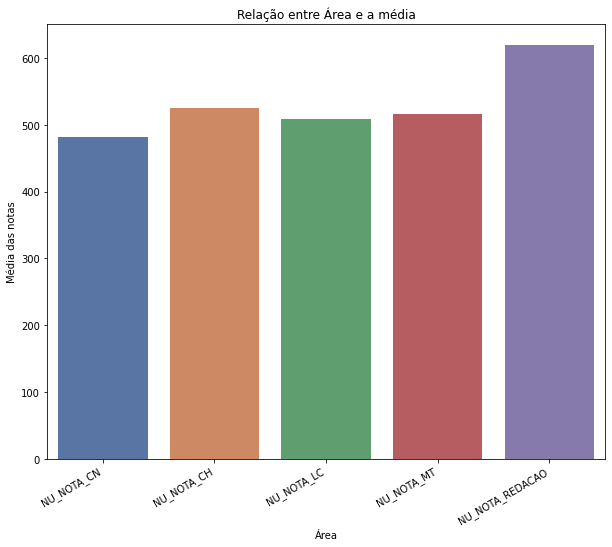

In [30]:
media_Nu_notas = []
for area in colunas_Nu_notas_selecionadas_areas.keys():
    media_Nu_nota = colunas_Nu_notas_selecionadas_areas[area].median()
    media_Nu_notas.append(media_Nu_nota)

f, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
ax.set(title='Relação entre Área e a média')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
sns.barplot(
    x=areas, 
    y=media_Nu_notas, 
    palette='deep',
    ax=ax, 
    )
ax.set_xlabel('Área')
ax.set_ylabel('Média das notas')

## 6. Análise de inscrito por estados

In [77]:
coluna_sg_uf_prova = micro_dados_selecionados['SG_UF_PROVA']

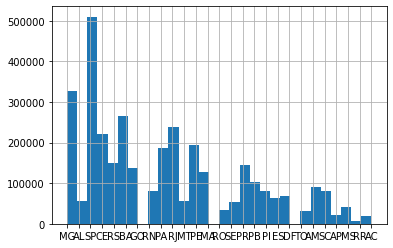

In [81]:
coluna_sg_uf_prova.hist(bins=30)

## Devido a pandêmia, Foi criado a modalidade da avaliação on-line. 

In [35]:
coluna_TP_PRESENCA_CN = micro_dados_selecionados['TP_PRESENCA_CN']
presencial_CN = coluna_TP_PRESENCA_CN.value_counts()
percent_presencial_CN = [100 * index/presencial_CN.sum() for index in presencial_CN]
percent_presencial_CN

[66.2523688489577, 33.704885669850306, 0.042745481191988274]

In [36]:
coluna_TP_PRESENCA_CH = micro_dados_selecionados['TP_PRESENCA_CH']
presencial_CH = coluna_TP_PRESENCA_CH.value_counts()
percent_presencial_CH = [100 * index/presencial_CH.sum() for index in presencial_CH]
percent_presencial_CH

[70.16214962865416, 29.718198423992693, 0.11965194735314316]

# Análise Questionário Socioeconômico

## Selecionando as colunas




In [37]:
colunas_selecionadas = [
    'NU_INSCRICAO',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
]

In [38]:
microdados_enem_selecionado = micro_dados_enem.filter(items=colunas_selecionadas)
microdados_enem_selecionado.head()


,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,210053865474,NaN,760.0,F,F
1,210052384164,461.5,560.0,B,B
2,210052589243,NaN,NaN,B,C
3,210052128335,659.5,780.0,B,B
4,210051353021,582.6,780.0,D,E


##  Fazendo análise dos dados faltantes e com candidatos que faltaram ou foram eliminados
Observar que em NU_NOTA_MT e NU_NOTA_REDACAO tem dados faltando. Observando a colunas existem informações que candidatos que faltaram a prova ou foram iliminados.

In [39]:
# Somatório de dados faltantes da coluna NU_NOTA_MT
soma_nan_Nu_Nota_Mt = microdados_enem_selecionado['NU_NOTA_MT'].isnull().sum()
soma_nan_Nu_Nota_Mt

1143988

aqui temos as informações dos dados faltantes na coluna NU_NOTA_MT que são pessoas que não apareceram na prova ou foram iliminados.

In [40]:
# Coluna TP_PRESENCA_MT
coluna_Tp_Presenca_Mt = micro_dados_selecionados['TP_PRESENCA_MT'].value_counts()
soma_faltante_eliminado = coluna_Tp_Presenca_Mt[0] + coluna_Tp_Presenca_Mt[2]
soma_faltante_eliminado
coluna_Tp_Presenca_Mt.shape

(3,)

In [41]:
print(f'Dados faltantes da coluna NU_NOTA_MT são: {soma_nan_Nu_Nota_Mt}')
print(f'Informações de pessoas que faltaram a prova ou foram eliminadas: \
{soma_faltante_eliminado}')

Dados faltantes da coluna NU_NOTA_MT são: 1143988
Informações de pessoas que faltaram a prova ou foram eliminadas: 1143988


Com essas informações pode remover os dados faltantes da coluna NU_NOTA_MT

In [43]:
microdados_enem_selecionado = microdados_enem_selecionado.dropna()

In [44]:
microdados_enem_selecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,210052384164,461.5,560.0,B,B
3,210052128335,659.5,780.0,B,B
4,210051353021,582.6,780.0,D,E
8,210053417016,493.4,520.0,B,B
9,210051128744,413.3,380.0,D,D


## Questionário Socioeconômico
Fazendo para os questionário
* Q001 - Até que série seu pai, ou o homem responsável por você, estudou?
* Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

Análise feito no canal [Programação Dinâmica](https://www.youtube.com/watch?v=ZcvFSEaRcTg&list=PL5TJqBvpXQv5N3iV68bGBkea0HjMk98lR&index=5) no enem de 2018.

## Definindo o Dicionário
1. Criando o dicionário



In [45]:
q001_q002 = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
}

2. Criando o Dataframa


In [46]:
microdados_enem_selecionado.filter(items=['NU_INSCRICAO', 'Q001']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,76399
B,349980
C,281447
D,245630
E,681530
F,246549
G,183606
H,172965


3. Criando uma nova coluna ***NO_Q001***


In [47]:
microdados_enem_selecionado['NO_Q001'] = [q001_q002[resposta] for resposta in microdados_enem_selecionado.Q001]

In [48]:
microdados_enem_selecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...


4. Criando uma nova colona ***NO_QOO2***

In [49]:
microdados_enem_selecionado['NO_Q002'] = [q001_q002[resposta] for resposta in microdados_enem_selecionado.Q002]

In [50]:
microdados_enem_selecionado.head(10)

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
10,210052320506,796.7,980.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
11,210054444526,514.9,680.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
12,210053193408,509.7,560.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
15,210053021203,445.8,540.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
16,210053788150,553.1,720.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


5. Comparando a distribuição entre Pai e Mãe

Distribuição dos candidatos por escolaridade do Pai

In [51]:
microdados_enem_selecionado.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",681530
Não completou a 4ª série/5º ano do Ensino Fundamental,349980
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",281447
"Completou a Faculdade, mas não completou a Pós-graduação",246549
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245630
Completou a Pós-graduação,183606
Não sei,172965
Nunca estudou,76399


Distribuição dos candidatos por escolaridade da Mãe

In [52]:
microdados_enem_selecionado.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",795005
"Completou a Faculdade, mas não completou a Pós-graduação",321187
Completou a Pós-graduação,309702
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245533
Não completou a 4ª série/5º ano do Ensino Fundamental,243449
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",226251
Não sei,48908
Nunca estudou,48071


## Nota em matemática
6. Olha do desempenho em matemática segundo a escolidade do Pai

In [53]:
microdados_enem_selecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",681530
Não completou a 4ª série/5º ano do Ensino Fundamental,349980
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",281447
"Completou a Faculdade, mas não completou a Pós-graduação",246549
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245630
Completou a Pós-graduação,183606
Não sei,172965
Nunca estudou,76399


7. Olha do desempenho em matemática segundo a escolidade da Mãe

In [54]:
microdados_enem_selecionado.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",795005
"Completou a Faculdade, mas não completou a Pós-graduação",321187
Completou a Pós-graduação,309702
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245533
Não completou a 4ª série/5º ano do Ensino Fundamental,243449
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",226251
Não sei,48908
Nunca estudou,48071


## Nota em Redação
8. Olha do desempenho em Redação segundo a escolidade do Pai

In [55]:
microdados_enem_selecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",681530
Não completou a 4ª série/5º ano do Ensino Fundamental,349980
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",281447
"Completou a Faculdade, mas não completou a Pós-graduação",246549
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245630
Completou a Pós-graduação,183606
Não sei,172965
Nunca estudou,76399


9. Olha do desempenho em Redação segundo a escolidade da Mãe

In [56]:
microdados_enem_selecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",795005
"Completou a Faculdade, mas não completou a Pós-graduação",321187
Completou a Pós-graduação,309702
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245533
Não completou a 4ª série/5º ano do Ensino Fundamental,243449
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",226251
Não sei,48908
Nunca estudou,48071


In [57]:
microdados_enem_selecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q001                                                                     
Completou a 4ª série/5º ano, mas não completou ...   281447.0  511.070163   
Completou a 8ª série/9º ano do Ensino Fundament...   245630.0  521.973493   
Completou a Faculdade, mas não completou a Pós-...   246549.0  597.511863   
Completou a Pós-graduação                            183606.0  613.461090   
Completou o Ensino Médio, mas não completou a F...   681530.0  543.113614   
Nunca estudou                                         76399.0  471.658243   
Não completou a 4ª série/5º ano do Ensino Funda...   349980.0  492.429393   
Não sei                                              172965.0  504.740075   

                                                                            \
                                                           std  min    25%   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...   97.281056  0.0  434.3   
Completou a 8ª série/9º ano do Ensino Fundament...  100.632967  0.0  441.2   
Completou a Faculdade, mas não completou a Pós-...  117.307726  0.0  502.7   
Completou a Pós-graduação                           119.512693  0.0  519.5   
Completou o Ensino Médio, mas não completou a F...  107.484050  0.0  454.7   
Nunca estudou                                        80.443339  0.0  412.9   
Não completou a 4ª série/5º ano do Ensino Funda...   89.595417  0.0  424.0   
Não sei                                              95.641760  0.0  430.1   

                                                                         
                                                      50%    75%    max  
NO_Q001                                                                  
Completou a 4ª série/5º ano, mas não completou ...  491.4  574.7  953.1  
Completou a 8ª série/9º ano do Ensino Fundament...  504.0  591.1  953.1  
Completou a Faculdade, mas não completou a Pós-...  601.8  684.0  953.1  
Completou a Pós-graduação                           622.3  700.7  953.1  
Completou o Ensino Médio, mas não completou a F...  529.4  621.5  953.1  
Nunca estudou                                       453.3  513.0  953.1  
Não completou a 4ª série/5º ano do Ensino Funda...  472.6  545.4  930.6  
Não sei                                             483.9  565.5  953.1

In [58]:
microdados_enem_selecionado.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q002                                                                     
Completou a 4ª série/5º ano, mas não completou ...   226251.0  501.083591   
Completou a 8ª série/9º ano do Ensino Fundament...   245533.0  510.363869   
Completou a Faculdade, mas não completou a Pós-...   321187.0  582.600755   
Completou a Pós-graduação                            309702.0  592.406291   
Completou o Ensino Médio, mas não completou a F...   795005.0  533.379838   
Nunca estudou                                         48071.0  464.279863   
Não completou a 4ª série/5º ano do Ensino Funda...   243449.0  484.995819   
Não sei                                               48908.0  493.232768   

                                                                            \
                                                           std  min    25%   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...   93.285421  0.0  428.7   
Completou a 8ª série/9º ano do Ensino Fundament...   96.508065  0.0  434.3   
Completou a Faculdade, mas não completou a Pós-...  117.282599  0.0  485.3   
Completou a Pós-graduação                           118.768435  0.0  494.5   
Completou o Ensino Médio, mas não completou a F...  104.741547  0.0  448.1   
Nunca estudou                                        76.369331  0.0  409.3   
Não completou a 4ª série/5º ano do Ensino Funda...   85.816724  0.0  420.1   
Não sei                                              94.289479  0.0  422.0   

                                                                           
                                                      50%      75%    max  
NO_Q002                                                                    
Completou a 4ª série/5º ano, mas não completou ...  480.9  559.000  953.1  
Completou a 8ª série/9º ano do Ensino Fundament...  490.7  573.300  953.1  
Completou a Faculdade, mas não completou a Pós-...  581.2  670.200  953.1  
Completou a Pós-graduação                           594.9  680.900  953.1  
Completou o Ensino Médio, mas não completou a F...  517.1  608.000  953.1  
Nunca estudou                                       447.3  502.600  953.1  
Não completou a 4ª série/5º ano do Ensino Funda...  465.9  534.100  948.5  
Não sei                                             469.9  546.325  948.8

In [59]:
microdados_enem_selecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        281447.0   
Completou a 8ª série/9º ano do Ensino Fundament...        245630.0   
Completou a Faculdade, mas não completou a Pós-...        246549.0   
Completou a Pós-graduação                                 183606.0   
Completou o Ensino Médio, mas não completou a F...        681530.0   
Nunca estudou                                              76399.0   
Não completou a 4ª série/5º ano do Ensino Funda...        349980.0   
Não sei                                                   172965.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  595.393094  179.965590   
Completou a 8ª série/9º ano do Ensino Fundament...  609.502341  180.343192   
Completou a Faculdade, mas não completou a Pós-...  695.124377  170.537581   
Completou a Pós-graduação                           714.138536  169.534287   
Completou o Ensino Médio, mas não completou a F...  636.649891  176.877190   
Nunca estudou                                       533.455935  186.068468   
Não completou a 4ª série/5º ano do Ensino Funda...  569.846105  178.667136   
Não sei                                             574.984766  184.116950   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  500.0  600.0  700.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  520.0  600.0  720.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  700.0  840.0   
Completou a Pós-graduação                           0.0  600.0  720.0  860.0   
Completou o Ensino Médio, mas não completou a F...  0.0  540.0  620.0  760.0   
Nunca estudou                                       0.0  460.0  540.0  620.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  480.0  580.0  660.0   
Não sei                                             0.0  500.0  580.0  680.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou                                        980.0  
Não completou a 4ª série/5º ano do Ensino Funda...   980.0  
Não sei                                              980.0

In [60]:
microdados_enem_selecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q002                                                              
Completou a 4ª série/5º ano, mas não completou ...        226251.0   
Completou a 8ª série/9º ano do Ensino Fundament...        245533.0   
Completou a Faculdade, mas não completou a Pós-...        321187.0   
Completou a Pós-graduação                                 309702.0   
Completou o Ensino Médio, mas não completou a F...        795005.0   
Nunca estudou                                              48071.0   
Não completou a 4ª série/5º ano do Ensino Funda...        243449.0   
Não sei                                                    48908.0   

                                                                            \
                                                          mean         std   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...  579.444599  179.646034   
Completou a 8ª série/9º ano do Ensino Fundament...  593.212725  178.763178   
Completou a Faculdade, mas não completou a Pós-...  679.834240  174.116882   
Completou a Pós-graduação                           694.966322  174.890803   
Completou o Ensino Médio, mas não completou a F...  624.292778  177.108825   
Nunca estudou                                       514.674960  185.175963   
Não completou a 4ª série/5º ano do Ensino Funda...  556.906785  177.513324   
Não sei                                             538.759712  195.462606   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q002                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  500.0  580.0  680.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  500.0  580.0  700.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  680.0  820.0   
Completou a Pós-graduação                           0.0  580.0  700.0  840.0   
Completou o Ensino Médio, mas não completou a F...  0.0  540.0  620.0  740.0   
Nunca estudou                                       0.0  440.0  540.0  600.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  480.0  560.0  640.0   
Não sei                                             0.0  460.0  560.0  640.0   

                                                            
                                                       max  
NO_Q002                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...   980.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou                                        980.0  
Não completou a 4ª série/5º ano do Ensino Funda...   980.0  
Não sei                                              980.0

## Incluinda a coluna SG_UF_PROVA

Verificando o resultado em cada estado

In [61]:
microdados_enem_selecionado['SG_UF_PROVA'] = micro_dados_enem.SG_UF_PROVA

In [62]:
microdados_enem_selecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_PROVA
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,AL
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,CE
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",CE
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,MG
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,BA


In [63]:
microdados_enem_selecionado.filter(items=['NU_NOTA_MT', 'NO_Q002'])\
                           .where(microdados_enem_selecionado.SG_UF_PROVA == 'MA')\
                           .groupby('NO_Q002')\
                           .count().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",33096
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",10193
Não completou a 4ª série/5º ano do Ensino Fundamental,9796
"Completou a Faculdade, mas não completou a Pós-graduação",9352
Completou a Pós-graduação,9125
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",8667
Nunca estudou,2653
Não sei,2033


In [64]:
microdados_enem_selecionado.filter(items=['SG_UF_PROVA', 'NU_NOTA_REDACAO','NO_Q002'])\
                           .groupby(['SG_UF_PROVA','NO_Q002'])\
                           .mean()

NU_NOTA_REDACAO
SG_UF_PROVA NO_Q002                                                            
AC          Completou a 4ª série/5º ano, mas não completou ...       557.446809
            Completou a 8ª série/9º ano do Ensino Fundament...       569.447853
            Completou a Faculdade, mas não completou a Pós-...       634.402619
            Completou a Pós-graduação                                655.943248
            Completou o Ensino Médio, mas não completou a F...       589.740693
...                                                                         ...
TO          Completou a Pós-graduação                                661.207334
            Completou o Ensino Médio, mas não completou a F...       594.484330
            Nunca estudou                                            468.071217
            Não completou a 4ª série/5º ano do Ensino Funda...       521.027190
            Não sei                                                  531.203501

[216 rows x 1 columns]

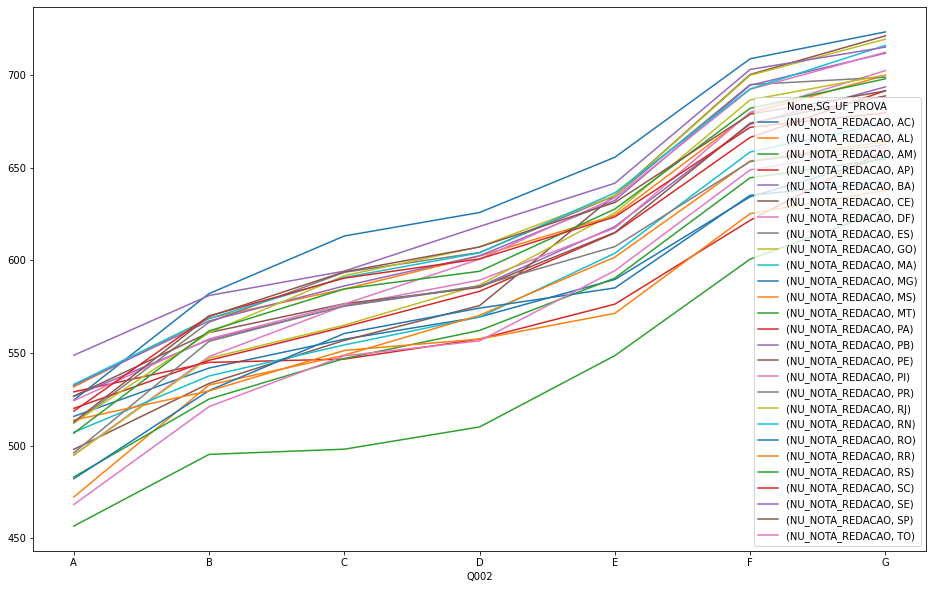

In [65]:
fig, ax = plt.subplots(figsize=(16, 10))

microdados_enem_selecionado.filter(items=['SG_UF_PROVA','Q002', 'NU_NOTA_REDACAO'])\
                           .where(microdados_enem_selecionado.Q002 != 'H')\
                           .groupby(['Q002','SG_UF_PROVA'])\
                           .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                           .unstack().plot(ax=ax,)